**Spam SMS detection**

In [1]:
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from scipy.sparse import csr_matrix
import scikitplot as skplt
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import wordcloud

**Creating emoticon list**

In [8]:
emotions_list = [":)", ":(", ":p", ":D", "-_-", ":o"]  

**Filtering SMS based on character length**

In [3]:
def char_flag(l):
    if l <= 40:
        return 1
    elif l <= 60:
        return 2
    elif l <= 80:
        return 3
    elif l <= 120:
        return 4
    elif l <= 160:
        return 5
    else:
        return 6 

**Removing stopwords**

In [4]:
stop_words = []
def text_process(mess):
    no_punct = re.sub('[^A-Za-z ]+', '', mess.lower())
    return np.array([stemmer.stem(word) for word in no_punct.split() if word not in stop_words])

**Data Preprocessing**

In [5]:
def preprocessing_text():
    for d, ln in zip(messages_data, token_4):
        token_1.append(d)
        token_2.append(d.count('$'))
        x =re.sub('[^0-9 ]+', '', d.lower())
        token_3.append(len(x))
        token_5.append(char_flag(ln))
        if (re.sub(r'[^://@]', '', d.lower())) is not '':
            token_6.append(1)
        else:
            token_6.append(0)
        token_7.append(len(x.split()))
        for emoji in emotions_list:
            if(re.search(re.escape(emoji), d)):
                token_8.append(1)
            else:
                token_8.append(0)
    return np.array(
        [np.array([token_1[i], token_2[i], token_3[i], token_4[i], token_5[i], token_6[i], 
                   token_7[i],token_8[i]], dtype=object) for i in
         range(len(messages_data))])

**Data conversion to vector form**

In [6]:
def data_mapper():
    data = preprocessing_text()
    labels = ['message','f1','f2','f3','f4','f5','f6','f7']
    df = pd.DataFrame.from_records(data,columns=labels)
    mapper = DataFrameMapper([
    (['f1', 'f2','f3','f4','f5','f6','f7'], None),
    ('message',CountVectorizer(analyzer = text_process,ngram_range=(2, 2)))])
    X=mapper.fit_transform(df)
    return X

**Main Function**

In [7]:
if __name__ == "__main__":
   
    messages = pd.read_csv("spam.csv", encoding='latin-1')
    messages = messages.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
    messages['length'] = messages['v2'].apply(len)
    messages_data = messages['v2']
    messages_labels = messages['v1']
    token_1 = []
    token_2 = []
    token_3 = []
    token_4 = messages['length']
    token_5 = []
    token_6 = []
    token_7 = []
    token_8 = []
    
    freq = pd.Series(' '.join(messages_data).split()).value_counts()
    stop_words = stopwords.words('english')
    stop_words.extend(freq[-9268:].index)
    
    mapped_data = data_mapper()
    trainset, testset, trainlabel, testlabel = train_test_split(mapped_data, messages_labels, test_size=0.33, random_state=42)

**Support vector machine**

/Users/guestuser/anaconda3/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


('confusion_matrix_SVM: ', array([[1581,    6],
       [  72,  180]]))


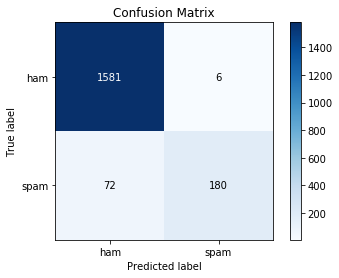

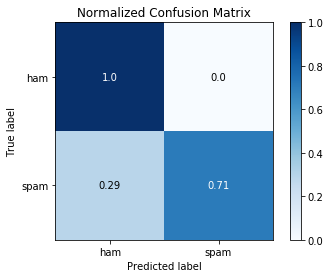

In [9]:
SVM = svm.SVC()
SVM.fit(trainset, trainlabel)
predicted_values_svm = SVM.predict(testset)

#Accuracy
acurracy_SVM = accuracy_score(testlabel, predicted_values_svm)

#5 fold cross validation
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf, trainset, trainlabel, cv=5)

#confusion matrix
confusion_matrix_SVM = confusion_matrix(testlabel,predicted_values_svm,labels=["ham","spam"] )
skplt.metrics.plot_confusion_matrix(testlabel,predicted_values_svm, normalize=False)
skplt.metrics.plot_confusion_matrix(testlabel,predicted_values_svm, normalize=True)

print('confusion_matrix_SVM: ', confusion_matrix_SVM)
plt.show()

In [10]:
print("acurracy_SVM " + str(acurracy_SVM))
print ('\n')
print('validation scores: ', scores)

acurracy_SVM 0.9575856443719413


('validation scores: ', array([0.95582329, 0.95850067, 0.95180723, 0.94235925, 0.94906166]))


**Multinomial naive bayes**

[[1581    6]
 [  20  232]]


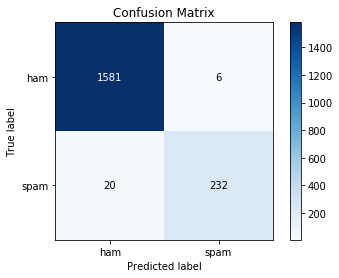

In [11]:
clf = MultinomialNB()
clf.fit(trainset, trainlabel)
predicted_values_svm = clf.predict(testset)

#accuracy
acurracy_SVM = accuracy_score(testlabel, predicted_values_svm)

#5 fold cross validation
scores = cross_val_score(clf, trainset, trainlabel, cv=5)

#Confusion matrix
confusion_matrix_SVM = confusion_matrix(testlabel,predicted_values_svm )
skplt.metrics.plot_confusion_matrix(testlabel,predicted_values_svm, normalize=False)
print(confusion_matrix_SVM)
plt.show()

In [12]:
print("acurracy_SVM " + str(acurracy_SVM))
print ('\n')
print('cross validation score: ', scores)


acurracy_SVM 0.9858618814573138


('cross validation score: ', array([0.98393574, 0.97991968, 0.98661312, 0.98793566, 0.97989276]))


**XGB Classifier**

[[1577   10]
 [  30  222]]


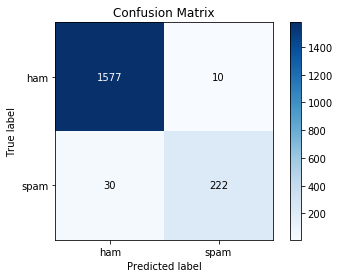

In [13]:
model = XGBClassifier()
model.fit(trainset,trainlabel)
y_predict = model.predict(testset)

#Accuracy
accuracy_XGBClassifier = accuracy_score(testlabel, y_predict)

#Cross validation
scores = cross_val_score(model, trainset, trainlabel, cv=5)

#Confusion matrix
confusion_matrix_SVM = confusion_matrix(testlabel,y_predict,labels=["ham","spam"] )
skplt.metrics.plot_confusion_matrix(testlabel,y_predict, normalize=False)
print(confusion_matrix_SVM)
plt.show()

In [14]:
print("acurracy_XGBClassifier " + str(accuracy_XGBClassifier))
print ('\n')
print('cross validation score: ', scores)

acurracy_XGBClassifier 0.9782490483958673


('cross validation score: ', array([0.96921017, 0.97858099, 0.97858099, 0.97050938, 0.97319035]))


In [15]:
def plot_text(lable):
    words = ' '.join(list(messages[messages['v1'] == lable]['v2']))
    wc = WordCloud(width = 512,height = 512).generate(words)
    plt.figure(figsize = (10,8),facecolor = 'k')
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

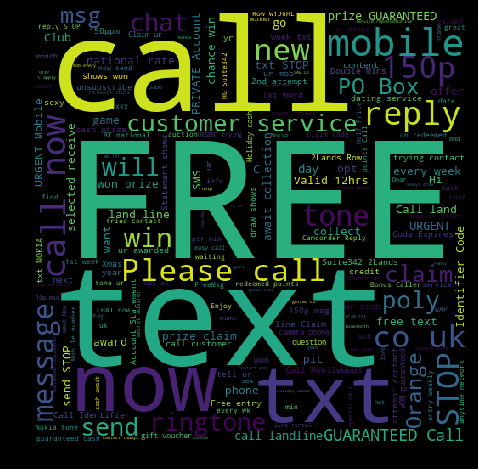

In [16]:
plot_text('spam')

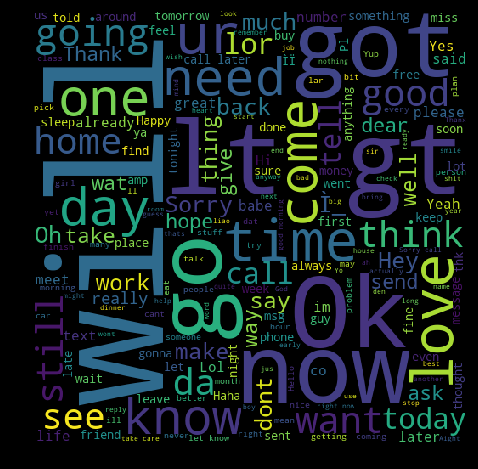

In [17]:
plot_text('ham')